In [1]:
#This is the script for Case - I in our paper

In [2]:
import numpy as np
from itertools import combinations

filename = 'sps.dat'
# Open the file in read mode
with open(filename, 'r') as file:
    # Read and print each line
    for line in file:
        print(line.strip())

1   0   0   0.5  -0.5  -0.5
2   0   0   0.5   0.5  -0.5
3   0   0   0.5  -0.5   0.5
4   0   0   0.5   0.5   0.5
5   0   1   1.5  -1.5  -0.5
6   0   1   1.5  -0.5  -0.5
7   0   1   1.5   0.5  -0.5
8   0   1   1.5   1.5  -0.5
9   0   1   1.5  -1.5   0.5
10   0   1   1.5  -0.5   0.5
11   0   1   1.5   0.5   0.5
12   0   1   1.5   1.5   0.5
13   0   1   0.5  -0.5  -0.5
14   0   1   0.5   0.5  -0.5
15   0   1   0.5  -0.5   0.5
16   0   1   0.5   0.5   0.5


In [3]:

n_val = []
l_val = []
states = []
orbitals=0
A=16
with open(filename, 'r') as qnum:
    for line in qnum:
        # Skip comments or empty lines
        if line.strip().startswith("#") or not line.strip():
            continue
        # Parse each line
        nums = line.split()
        n = int(nums[1])
        l = int(nums[2])
        j = float(nums[3])
        mj = float(nums[4])
        tz = float(nums[5])

        n_val.append(n)
        l_val.append(l)
        orbitals+=1
        
        # Append state as a tuple
        states.append((n, l, j, mj, tz))

# Assign indices to single-particle states
indexed_states = {index: state for index, state in enumerate(states)}

# Output the indexed states
for index, state in indexed_states.items():
    print(f"{index} : {state}")

0 : (0, 0, 0.5, -0.5, -0.5)
1 : (0, 0, 0.5, 0.5, -0.5)
2 : (0, 0, 0.5, -0.5, 0.5)
3 : (0, 0, 0.5, 0.5, 0.5)
4 : (0, 1, 1.5, -1.5, -0.5)
5 : (0, 1, 1.5, -0.5, -0.5)
6 : (0, 1, 1.5, 0.5, -0.5)
7 : (0, 1, 1.5, 1.5, -0.5)
8 : (0, 1, 1.5, -1.5, 0.5)
9 : (0, 1, 1.5, -0.5, 0.5)
10 : (0, 1, 1.5, 0.5, 0.5)
11 : (0, 1, 1.5, 1.5, 0.5)
12 : (0, 1, 0.5, -0.5, -0.5)
13 : (0, 1, 0.5, 0.5, -0.5)
14 : (0, 1, 0.5, -0.5, 0.5)
15 : (0, 1, 0.5, 0.5, 0.5)


In [4]:
#checking allowed  couple states
# Checking parity
def parity(l1, l2):
    return (-1)**(l1 + l2)

def allowed_pair(state1, state2, isospin_conservation=False):
    
    _, l1, j1, mj1, tz1 = state1
    _, l2, j2, mj2, tz2 = state2

    # Ensure parity is positive
    if parity(l1, l2) != 1:
        return False

    # Ensure total angular momentum J=0
    if j1 != j2 or mj1 + mj2 != 0:
        return False
    
    # If isospin conservation is enabled, check the total isospin (T)
    if isospin_conservation:
        # For a proton and neutron, tz1 and tz2 are typically ±1/2
        total_isospin = tz1 + tz2
        if total_isospin != 0:
            return False  # Only allow isospin 0 pairs
    
    return True

# Find all two-body states coupled to Jπ = 0+
coupled_states = []
for (index1, state1), (index2, state2) in combinations(indexed_states.items(), 2):
    if allowed_pair(state1, state2):
        coupled_states.append(((index1, state1), (index2, state2)))

# Output the number of valid coupled states
print(f"Number of valid two-body states: {len(coupled_states)}\n")
for pair in coupled_states:
    (index1, state1), (index2, state2) = pair
    print(f"Indices: ({index1}, {index2}), Coupled States: ({state1}, {state2})")

Number of valid two-body states: 16

Indices: (0, 1), Coupled States: ((0, 0, 0.5, -0.5, -0.5), (0, 0, 0.5, 0.5, -0.5))
Indices: (0, 3), Coupled States: ((0, 0, 0.5, -0.5, -0.5), (0, 0, 0.5, 0.5, 0.5))
Indices: (1, 2), Coupled States: ((0, 0, 0.5, 0.5, -0.5), (0, 0, 0.5, -0.5, 0.5))
Indices: (2, 3), Coupled States: ((0, 0, 0.5, -0.5, 0.5), (0, 0, 0.5, 0.5, 0.5))
Indices: (4, 7), Coupled States: ((0, 1, 1.5, -1.5, -0.5), (0, 1, 1.5, 1.5, -0.5))
Indices: (4, 11), Coupled States: ((0, 1, 1.5, -1.5, -0.5), (0, 1, 1.5, 1.5, 0.5))
Indices: (5, 6), Coupled States: ((0, 1, 1.5, -0.5, -0.5), (0, 1, 1.5, 0.5, -0.5))
Indices: (5, 10), Coupled States: ((0, 1, 1.5, -0.5, -0.5), (0, 1, 1.5, 0.5, 0.5))
Indices: (6, 9), Coupled States: ((0, 1, 1.5, 0.5, -0.5), (0, 1, 1.5, -0.5, 0.5))
Indices: (7, 8), Coupled States: ((0, 1, 1.5, 1.5, -0.5), (0, 1, 1.5, -1.5, 0.5))
Indices: (8, 11), Coupled States: ((0, 1, 1.5, -1.5, 0.5), (0, 1, 1.5, 1.5, 0.5))
Indices: (9, 10), Coupled States: ((0, 1, 1.5, -0.5, 0.5)

In [5]:
me2b = []

# List of given values for (a, b, c, d) and their corresponding interaction values
given_values = [
    (0, 1, 0, 1, -4.61898),
    (0, 3, 0, 3, -4.97017),
    (1, 2, 1, 2, -4.97017),
    (2, 3, 2, 3, -4.65831),
    (4, 7, 4, 7, -1.68802), 
    (4, 11, 4, 11, -2.08818),
    (5, 6, 5, 6, -1.68802), 
    (5, 10, 5, 10, -2.08818),
    (6, 9, 6, 9, -2.08818),
    (7, 8, 7, 8, -2.08818),
    (8, 11, 8, 11, -1.70773),
    (9, 10, 9, 10, -1.70773),
    (12, 13, 12, 13, -0.653924),
    (12, 15, 12, 15, -0.995628),
    (13, 14, 13, 14, -0.995628),
    (14, 15, 14, 15, -0.670327),
]

# Assign values and their antisymmetric combinations
for a, b, c, d, v in given_values:
    # Original term
    me2b.append((a, b, c, d, v))
    # Antisymmetric combinations
    me2b.append((a, b, d, c, -v))  # Swap (c, d)
    me2b.append((b, a, c, d, -v))  # Swap (a, b)
    me2b.append((b, a, d, c, v))   # Swap (a, b) and (c, d)

# Output matrix elements
print(f"Total matrix elements: {len(me2b)}")
for element in me2b:
    print(f"me2b: {element}")

Total matrix elements: 64
me2b: (0, 1, 0, 1, -4.61898)
me2b: (0, 1, 1, 0, 4.61898)
me2b: (1, 0, 0, 1, 4.61898)
me2b: (1, 0, 1, 0, -4.61898)
me2b: (0, 3, 0, 3, -4.97017)
me2b: (0, 3, 3, 0, 4.97017)
me2b: (3, 0, 0, 3, 4.97017)
me2b: (3, 0, 3, 0, -4.97017)
me2b: (1, 2, 1, 2, -4.97017)
me2b: (1, 2, 2, 1, 4.97017)
me2b: (2, 1, 1, 2, 4.97017)
me2b: (2, 1, 2, 1, -4.97017)
me2b: (2, 3, 2, 3, -4.65831)
me2b: (2, 3, 3, 2, 4.65831)
me2b: (3, 2, 2, 3, 4.65831)
me2b: (3, 2, 3, 2, -4.65831)
me2b: (4, 7, 4, 7, -1.68802)
me2b: (4, 7, 7, 4, 1.68802)
me2b: (7, 4, 4, 7, 1.68802)
me2b: (7, 4, 7, 4, -1.68802)
me2b: (4, 11, 4, 11, -2.08818)
me2b: (4, 11, 11, 4, 2.08818)
me2b: (11, 4, 4, 11, 2.08818)
me2b: (11, 4, 11, 4, -2.08818)
me2b: (5, 6, 5, 6, -1.68802)
me2b: (5, 6, 6, 5, 1.68802)
me2b: (6, 5, 5, 6, 1.68802)
me2b: (6, 5, 6, 5, -1.68802)
me2b: (5, 10, 5, 10, -2.08818)
me2b: (5, 10, 10, 5, 2.08818)
me2b: (10, 5, 5, 10, 2.08818)
me2b: (10, 5, 10, 5, -2.08818)
me2b: (6, 9, 6, 9, -2.08818)
me2b: (6, 9, 9, 6

In [6]:
def energy(homega, i, n, l):
    #hbaromega=41.5*A^-(1/3)
    return homega * (2 * n[i] + l[i] + 1.5)

o_hoenergy = np.zeros(orbitals)

print("energy leveles for oxegen")
for i in range(orbitals):
    o_hoenergy[i] = energy(16.47, i, n_val, l_val)
    print(f"{i} : {o_hoenergy[i]:.3f}")

print("Energy levels for helium")
he_hoenergy=np.zeros(orbitals)
for i in range(orbitals):
    he_hoenergy[i] = energy(26.14, i, n_val, l_val)
    print(f"{i} : {he_hoenergy[i]:.3f}")

print("Energy levels for carbon")
c_hoenergy=np.zeros(orbitals)
for i in range(orbitals):
    c_hoenergy[i] = energy(18.13, i, n_val, l_val)
    print(f"{i} : {c_hoenergy[i]:.3f}")

energy leveles for oxegen
0 : 24.705
1 : 24.705
2 : 24.705
3 : 24.705
4 : 41.175
5 : 41.175
6 : 41.175
7 : 41.175
8 : 41.175
9 : 41.175
10 : 41.175
11 : 41.175
12 : 41.175
13 : 41.175
14 : 41.175
15 : 41.175
Energy levels for helium
0 : 39.210
1 : 39.210
2 : 39.210
3 : 39.210
4 : 65.350
5 : 65.350
6 : 65.350
7 : 65.350
8 : 65.350
9 : 65.350
10 : 65.350
11 : 65.350
12 : 65.350
13 : 65.350
14 : 65.350
15 : 65.350
Energy levels for carbon
0 : 27.195
1 : 27.195
2 : 27.195
3 : 27.195
4 : 45.325
5 : 45.325
6 : 45.325
7 : 45.325
8 : 45.325
9 : 45.325
10 : 45.325
11 : 45.325
12 : 45.325
13 : 45.325
14 : 45.325
15 : 45.325


In [7]:
def hartree_fock_solver(ho_energy, me2b, orbitals, A, max_iterations=100, epsilon=1.0e-14):
    # Initialize coefficients and density matrix
    C = np.eye(orbitals)  # HF coefficients (initial guess)
    DensityMatrix = np.zeros((orbitals, orbitals))
    for gamma in range(orbitals):
        for delta in range(orbitals):
            sum = 0.0
            for i in range(A):
                sum += C[gamma][i] * C[delta][i]
            DensityMatrix[gamma][delta] = sum

    # Create a dictionary for the interaction matrix elements
    interaction_dict = {(a, b, c, d): v for a, b, c, d, v in me2b}

    def interaction_v(a, b, c, d):
        return interaction_dict.get((a, b, c, d), 0)  # Return value if exists, otherwise 0

    # Iterate Hartree-Fock equations
    old_energies = np.zeros(orbitals)
    new_energies = np.zeros(orbitals)
    count = 0
    difference = 1.0

    while count < max_iterations and difference > epsilon:
        HFmatrix = np.zeros((orbitals, orbitals))
        for alpha in range(orbitals):
            for beta in range(orbitals):
                sumFockTerm = 0
                for gamma in range(orbitals):
                    for delta in range(orbitals):
                        sumFockTerm+=DensityMatrix[gamma][delta] * interaction_v(alpha, gamma, beta, delta)
                HFmatrix[alpha][beta] = sumFockTerm
                if beta == alpha:
                    HFmatrix[alpha][alpha] += ho_energy[alpha]

        # Solve eigenvalue problem
        spenergies, C = np.linalg.eigh(HFmatrix)

        # Update density matrix
        DensityMatrix = np.zeros((orbitals, orbitals))
        for gamma in range(orbitals):
            for delta in range(orbitals):
                sum=0.0
                for i in range(A):
                    sum+= C[gamma][i] * C[delta][i]
                DensityMatrix[gamma][delta]=sum

        # Check convergence

        new_energies = spenergies
        difference = np.mean(np.abs(new_energies - old_energies))
        old_energies = new_energies
        count += 1


    # Compute Binding Energy directly inside the solver
    BindingEnergy = 0.0
    
    # Sort single-particle energies and select the lowest A levels
    occupied_indices = np.argsort(spenergies)[:A]  # Indices of the lowest A energy levels
    occupied_spenergies = spenergies[occupied_indices]  # Single-particle energies of occupied states
    
    # Add the contribution of single-particle energies
    BindingEnergy = np.sum(occupied_spenergies)
    
     # Add interaction energy contribution for occupied levels, as the DensityMatrix is identity always, we have excluded it form the definition to reduce computation time.
    for alpha in occupied_indices:
        for beta in occupied_indices:
            BindingEnergy -= 0.5 * interaction_v(alpha, beta, alpha, beta)
    
  
    BindingEnergy /= A

    return new_energies, C, BindingEnergy

In [8]:
new_energies, C, BE=hartree_fock_solver(o_hoenergy, me2b, orbitals, A, max_iterations=100, epsilon=1.0e-14)
print("Single-particle energies, ordering may have changed")
for i in range(orbitals):
    print('{0:4d}  {1:.4f}'.format(i, new_energies[i]))

print(f'Binding Energy: {BE}')

Single-particle energies, ordering may have changed
   0  15.0765
   1  15.0765
   2  15.1158
   3  15.1158
   4  37.3791
   5  37.3791
   6  37.3791
   7  37.3791
   8  37.3988
   9  37.3988
  10  37.3988
  11  37.3988
  12  39.5090
  13  39.5090
  14  39.5254
  15  39.5254
Binding Energy: 34.7026651875


In [9]:
he_energies, HeC, HeBE=hartree_fock_solver(he_hoenergy, me2b, orbitals, 4, max_iterations=100, epsilon=1.0e-14)
print("Single-particle energies, ordering may have changed")
for i in range(orbitals):
    print('{0:4d}  {1:.4f}'.format(i, he_energies[i]))

print(f'Binding Energy: {HeBE}')

Single-particle energies, ordering may have changed
   0  29.5815
   1  29.5815
   2  29.6209
   3  29.6209
   4  65.3500
   5  65.3500
   6  65.3500
   7  65.3500
   8  65.3500
   9  65.3500
  10  65.3500
  11  65.3500
  12  65.3500
  13  65.3500
  14  65.3500
  15  65.3500
Binding Energy: 34.4055925


In [10]:
c_energies, HeC, HeBE=hartree_fock_solver(c_hoenergy, me2b, orbitals, 12, max_iterations=100, epsilon=1.0e-14)
print("Single-particle energies, ordering may have changed")
for i in range(orbitals):
    print('{0:4d}  {1:.4f}'.format(i, c_energies[i]))

print(f'Binding Energy: {HeBE}')

Single-particle energies, ordering may have changed
   0  17.5665
   1  17.5665
   2  17.6059
   3  17.6059
   4  41.5291
   5  41.5291
   6  41.5291
   7  41.5291
   8  41.5488
   9  41.5488
  10  41.5488
  11  41.5488
  12  45.3250
  13  45.3250
  14  45.3250
  15  45.3250
Binding Energy: 36.418179166666654


In [11]:
from scipy.optimize import minimize

# Indices and initial values for the 16 elements to optimize
indices_to_optimize = [
    (0, 1, 0, 1, -4.61898),
    (0, 3, 0, 3, -4.97017),
    (1, 2, 1, 2, -4.97017),
    (2, 3, 2, 3, -4.65831),
    (4, 7, 4, 7, -1.68802), 
    (4, 11, 4, 11, -2.08818),
    (5, 6, 5, 6, -1.68802), 
    (5, 10, 5, 10, -2.08818),
    (6, 9, 6, 9, -2.08818),
    (7, 8, 7, 8, -2.08818),
    (8, 11, 8, 11, -1.70773),
    (9, 10, 9, 10, -1.70773),
    (12, 13, 12, 13, -0.653924),
    (12, 15, 12, 15, -0.995628),
    (13, 14, 13, 14, -0.995628),
    (14, 15, 14, 15, -0.670327),
]

# Extract initial values and indices
initial_v = [v for _, _, _, _, v in indices_to_optimize]
indices = [(a, b, c, d) for a, b, c, d, _ in indices_to_optimize]

# Target binding energies and A values for each nucleus
nuclear_data = {
    "16O": {"A": 16, "target_BE": 7.98, "ho_energy": o_hoenergy},
    "12C": {"A": 12, "target_BE": 7.68, "ho_energy": c_hoenergy},
    "4He": {"A": 4, "target_BE": 7.07, "ho_energy": he_hoenergy},
}

# Composite cost function for multiple nuclei
def composite_cost_function(v_params):
    total_cost = 0.0
    
    for nucleus, data in nuclear_data.items():
        A = data["A"]
        target_BE = data["target_BE"]
        ho_energy = data["ho_energy"]
        
        # Create a temporary matrix for the 16 elements
        temp_me2b = [(a, b, c, d, v_params[i]) for i, (a, b, c, d) in enumerate(indices)]
        
        # Manually antisymmetrize and reconstruct the full me2b
        full_me2b = []
        for (a, b, c, d, v) in temp_me2b:
            full_me2b.append((a, b, c, d, v))
            full_me2b.append((a, b, d, c, -v))
            full_me2b.append((b, a, c, d, -v))
            full_me2b.append((b, a, d, c, v))
        
        # Solve Hartree-Fock equations with the updated interaction matrix
        _, _, calculated_BE = hartree_fock_solver(ho_energy, full_me2b, orbitals, A)
        
        # Add the cost for this nucleus
        total_cost += (calculated_BE - target_BE) ** 2
    
    return total_cost

# Perform optimization
result = minimize(
    composite_cost_function,
    initial_v,
    method='BFGS',
    options={'maxiter': 50}
)

# Optimized interaction parameters
optimized_v = result.x

# Print results
print("Optimized Interaction Parameters for 16 Elements:", optimized_v)

Optimized Interaction Parameters for 16 Elements: [-31.9545726  -32.3057626  -32.3057626  -31.9939026  -31.12749426
 -31.52765427 -31.12749426 -31.52765009 -31.52764916 -31.52765426
 -31.14720426 -31.14720426 -21.3300462  -21.6717502  -21.6717502
 -21.3464492 ]


In [12]:
# Reconstruct full me2b using antisymmetrization
optimized_me2b = []
for i, (a, b, c, d) in enumerate(indices):
    v_opt = optimized_v[i]
    # Add antisymmetric combinations
    optimized_me2b.append((a, b, c, d, v_opt))           # Original term
    optimized_me2b.append((a, b, d, c, -v_opt))          # Swap (c, d)
    optimized_me2b.append((b, a, c, d, -v_opt))          # Swap (a, b)
    optimized_me2b.append((b, a, d, c, v_opt))           # Swap (a, b) and (c, d)

# Now, optimized_me2b contains the full 64 elements
print("Full antisymmetrized me2b:")
for element in optimized_me2b:
    print(element)

Full antisymmetrized me2b:
(0, 1, 0, 1, -31.95457260308935)
(0, 1, 1, 0, 31.95457260308935)
(1, 0, 0, 1, 31.95457260308935)
(1, 0, 1, 0, -31.95457260308935)
(0, 3, 0, 3, -32.305762603089335)
(0, 3, 3, 0, 32.305762603089335)
(3, 0, 0, 3, 32.305762603089335)
(3, 0, 3, 0, -32.305762603089335)
(1, 2, 1, 2, -32.305762603089335)
(1, 2, 2, 1, 32.305762603089335)
(2, 1, 1, 2, 32.305762603089335)
(2, 1, 2, 1, -32.305762603089335)
(2, 3, 2, 3, -31.993902603089342)
(2, 3, 3, 2, 31.993902603089342)
(3, 2, 2, 3, 31.993902603089342)
(3, 2, 3, 2, -31.993902603089342)
(4, 7, 4, 7, -31.127494262614753)
(4, 7, 7, 4, 31.127494262614753)
(7, 4, 4, 7, 31.127494262614753)
(7, 4, 7, 4, -31.127494262614753)
(4, 11, 4, 11, -31.527654268851776)
(4, 11, 11, 4, 31.527654268851776)
(11, 4, 4, 11, 31.527654268851776)
(11, 4, 11, 4, -31.527654268851776)
(5, 6, 5, 6, -31.127494262614753)
(5, 6, 6, 5, 31.127494262614753)
(6, 5, 5, 6, 31.127494262614753)
(6, 5, 6, 5, -31.127494262614753)
(5, 10, 5, 10, -31.527650088242

In [13]:
# Use the fully reconstructed interaction matrix in the Hartree-Fock solver
new_energies, C, BE = hartree_fock_solver(o_hoenergy, optimized_me2b, orbitals, 16)
print("Single-particle energies:")
for i in range(orbitals):
    print(f"{i:4d}  {new_energies[i]:.4f}")
print(f"Binding Energy: {BE:.4f} MeV")


Single-particle energies:
   0  -39.5947
   1  -39.5947
   2  -39.5553
   3  -39.5553
   4  -21.4999
   5  -21.4999
   6  -21.4999
   7  -21.4999
   8  -21.4801
   9  -21.4801
  10  -21.4801
  11  -21.4801
  12  -1.8432
  13  -1.8432
  14  -1.8268
  15  -1.8268
Binding Energy: 7.9800 MeV


In [14]:
# Use the fully reconstructed interaction matrix in the Hartree-Fock solver
new_energies, C, BE = hartree_fock_solver(c_hoenergy, optimized_me2b, orbitals, 12)
print("Single-particle energies:")
for i in range(orbitals):
    print(f"{i:4d}  {new_energies[i]:.4f}")
print(f"Binding Energy: {BE:.4f} MeV")


Single-particle energies:
   0  -37.1047
   1  -37.1047
   2  -37.0653
   3  -37.0653
   4  -17.3499
   5  -17.3499
   6  -17.3499
   7  -17.3499
   8  -17.3301
   9  -17.3301
  10  -17.3301
  11  -17.3301
  12  45.3250
  13  45.3250
  14  45.3250
  15  45.3250
Binding Energy: 7.6800 MeV


In [15]:
# Use the fully reconstructed interaction matrix in the Hartree-Fock solver
new_energies, C, BE = hartree_fock_solver(he_hoenergy, optimized_me2b, orbitals, 4)
print("Single-particle energies:")
for i in range(orbitals):
    print(f"{i:4d}  {new_energies[i]:.4f}")
print(f"Binding Energy: {BE:.4f} MeV")

Single-particle energies:
   0  -25.0897
   1  -25.0897
   2  -25.0503
   3  -25.0503
   4  65.3500
   5  65.3500
   6  65.3500
   7  65.3500
   8  65.3500
   9  65.3500
  10  65.3500
  11  65.3500
  12  65.3500
  13  65.3500
  14  65.3500
  15  65.3500
Binding Energy: 7.0700 MeV


In [16]:
def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)

# Double factorial
def doublefactorial(n):
    if n<-1:
        exit(0)
    elif n==-1:
        return 1
    elif n==0:
        return 1
    else:
        return n*doublefactorial(n-2)

In [17]:
hbarc=197
mc2=938
homega=16.47
def laguerre(k, a, x):
    if k<0:
        exit(1)
    elif k==0:
        return 1
    elif k==1:
        return 1+a-x
    else:
        return ((2*k-1+a-x)*laguerre(k-1, a, x)-(k-1+a)*laguerre(k-2, a, x))/k

#Radial part of the Harmonic Oscillator Wave functions
def R_nl(n,l,r):
    ν=(mc2*homega)/(2*hbarc**2)
    N=np.sqrt(np.sqrt((2*(ν**3))/np.pi)*(((2**(n+2*l+3))*factorial(n)*(ν**l))/(doublefactorial(2*n+2*l+1))))
    return N*laguerre(n, (l+0.5), 2*ν*(r**2))*(r**l)*np.exp(-(ν*r**2))

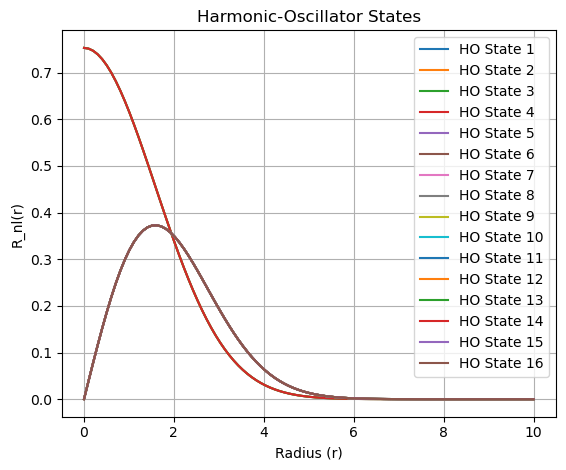

In [18]:
#Find the harmonic oscillator states
import matplotlib.pyplot as plt
r = np.linspace(0, 10, 100)
hostates=np.zeros((A, len(r)))
for i in range(A):
    hostates[i]=R_nl(n_val[i], l_val[i], r)

for i in range(A):
    plt.plot(r, hostates[i], label=f"HO State {i+1}")

plt.xlabel("Radius (r)")
plt.ylabel("R_nl(r)")
plt.title("Harmonic-Oscillator States")
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.grid()
plt.tight_layout(rect=[0, 0, 0.90, 1])
plt.show()

Single-particle energies:
   0  -37.1047
   1  -37.1047
   2  -37.0653
   3  -37.0653
   4  -17.3499
   5  -17.3499
   6  -17.3499
   7  -17.3499
   8  -17.3301
   9  -17.3301
  10  -17.3301
  11  -17.3301
  12  45.3250
  13  45.3250
  14  45.3250
  15  45.3250
Binding Energy: 7.6800 MeV


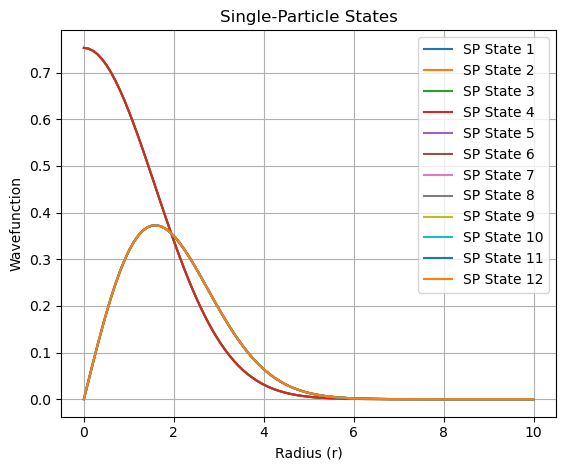

In [19]:
new_energies, C, BE = hartree_fock_solver(c_hoenergy, optimized_me2b, orbitals, 12)
print("Single-particle energies:")
for i in range(orbitals):
    print(f"{i:4d}  {new_energies[i]:.4f}")
print(f"Binding Energy: {BE:.4f} MeV")

#Find the single particle states
spstates=np.zeros((12, len(r)))
for i in range(12):
    for gamma in range(orbitals):
        spstates[i]+=C[gamma][i]*R_nl(n_val[gamma], l_val[gamma], r)

for i in range(12):
    plt.plot(r, spstates[i], label=f"SP State {i+1}")

plt.xlabel("Radius (r)")
plt.ylabel("Wavefunction")
plt.title("Single-Particle States")
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.grid()
plt.tight_layout(rect=[0, 0, 0.90, 1])

plt.show()